# Following https://www.dzialowski.eu/football-data-visualisations/ on how to get data and https://github.com/mckayjohns/ for how to make visualisation in football.




In [ ]:
import pandas as pd
import numpy as np
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns
import matplotlib.patches as mpatches
pd.set_option('display.max_columns', None)
from highlight_text import fig_text
#Set general use colors
text_color = 'w'

In [2]:
i=np.arange(1396,1401)
i

array([1396, 1397, 1398, 1399, 1400])

In [3]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r',encoding='utf8')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')
    for k in i:
        data_txt=data_txt.replace('\n</td></tr><tr><td class="line-number" value="'+ str(k) +'"></td><td class="line-content">',' ')
    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [4]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [5]:
match_html_path = 'matches/ArgCro.html'
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

In [6]:
events_dict

[{'id': 2491048815.0,
  'eventId': 2,
  'minute': 0,
  'second': 0,
  'teamId': 346,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2491048805.0,
  'eventId': 2,
  'minute': 0,
  'second': 0,
  'teamId': 337,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2491048827.0,
  'eventId': 3,
  'minute': 0,
  'second': 0,
  'teamId': 337,
  'playerId': 75217,
  'x': 49.8,
  'y': 49.7,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 1, 'displayName': 'Pass'},
  'outcomeTy

In [7]:
df = pd.DataFrame(events_dict)
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,cardType,isGoal
0,2.491049e+09,2,0,0.0,346,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.491049e+09,2,0,0.0,337,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.491049e+09,3,0,0.0,337,49.8,49.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 216, 218]",True,75217.0,35.0,40.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.491049e+09,4,0,3.0,337,33.0,48.8,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[91, 120, 124, 128, 36, 37, 217, 218]",True,29106.0,77.1,57.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.491049e+09,3,0,6.0,346,24.8,44.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 139, 36, 37, 216, 218]",True,75691.0,39.5,51.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,2.491084e+09,982,95,0.0,337,0.0,0.0,100,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1623,2.491085e+09,785,0,0.0,346,0.0,0.0,10,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1624,2.491085e+09,983,0,0.0,337,0.0,0.0,10,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1625,2.491033e+09,1,0,0.0,346,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 131, 'displayName': 'TeamP...",[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'relatedEventId', 'relatedPlayerId', 'goalMouthZ', 'goalMouthY',
       'isShot', 'blockedX', 'blockedY', 'cardType', 'isGoal'],
      dtype='object')

In [9]:
df[df['minute']==68]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,cardType,isGoal
1213,2.491075e+09,748,68,0.0,337,61.2,95.7,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[91, 119, 117, 30, 36, 38, 216, 218]",True,70524.0,63.0,75.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,2.491075e+09,749,68,3.0,337,64.9,81.8,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[91, 119, 117, 30, 205, 36, 37, 217, 218]",True,20874.0,80.8,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1215,2.491075e+09,750,68,5.0,337,85.8,86.2,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 3, 'displayName': 'TakeOn'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 53]",True,75217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1216,2.491075e+09,578,68,6.0,346,14.2,13.8,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 7, 'displayName': 'Tackle'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 178, 'displayName': 'Stand...","[91, 143]",True,369430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,2.491075e+09,579,68,7.0,346,10.6,3.8,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 49, 'displayName': 'BallRecovery'}","{'value': 1, 'displayName': 'Successful'}",[],[93],False,369430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1218,2.491075e+09,580,68,7.0,346,10.8,3.7,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 37, 215, 218]",True,369430.0,22.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1219,2.491075e+09,581,68,9.0,346,22.4,2.9,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 178, 'displayName': 'Stand...","[91, 118, 120, 29, 36, 38, 215, 218]",True,125547.0,30.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1220,2.491075e+09,751,68,9.0,337,67.7,94.1,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 8, 'displayName': 'Interception'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 178, 'displayName': 'Stand...","[91, 101, 56]",True,70524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,2.491075e+09,583,68,32.0,346,28.9,0.0,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[91, 212, 36, 37, 216]",True,303728.0,58.5,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,2.491075e+09,584,68,33.0,346,55.4,6.4,73,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[91, 119, 117, 30, 36, 38, 216, 218]",True,365409.0,55.6,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
z=df.iloc[1228].qualifiers
z

[{'type': {'value': 214, 'displayName': 'BigChance'}},
 {'type': {'value': 102, 'displayName': 'GoalMouthY'}, 'value': '50.2'},
 {'type': {'value': 78, 'displayName': 'LowCentre'}},
 {'type': {'value': 154, 'displayName': 'IntentionalAssist'}},
 {'type': {'value': 20, 'displayName': 'RightFoot'}},
 {'type': {'value': 17, 'displayName': 'BoxCentre'}},
 {'type': {'value': 55, 'displayName': 'RelatedEventId'}, 'value': '587'},
 {'type': {'value': 22, 'displayName': 'RegularPlay'}},
 {'type': {'value': 29, 'displayName': 'Assisted'}},
 {'type': {'value': 103, 'displayName': 'GoalMouthZ'}, 'value': '1.9'},
 {'type': {'value': 178, 'displayName': 'StandingSave'}},
 {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Center'}]

In [11]:
a=[]
i=0
for i in range(len(df)-1):
    if df['isGoal'].iloc[i+1]==True:
        a.append(df['id'].iloc[i])
a

[2491059259.0, 2491061423.0, 2491075493.0]

In [12]:
l=0
ass=[]
si=[]
def getAssist(df):
    for l in range(len(df)):
        if df.iloc[l]['isGoal']==True:
            c=df.iloc[l]['qualifiers']
            k=0
            for k in range(len(c)):
                if c[k]['type']['displayName']=='Assisted':
                    ass.append(df.iloc[l-1].id)
                    si.append(l-1)
        else:
            c=df.iloc[l]['qualifiers']
            k=0
            for k in range(len(c)):
                if c[k]['type']['displayName']=='IntentionalGoalAssist':
                    ass.append(df.iloc[l].id)
                    si.append(l)
    return ass,si



ass,si=getAssist(df)
si

[1227, 1227]

In [13]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,102248,23,Emiliano Martínez,GK,195,88,30,True,False,home,"{'totalSaves': {'44': 1.0, '77': 1.0, '93': 1....",NaN,NaN,NaN,NaN,NaN,NaN,346
1,303728,26,Nahuel Molina,DR,175,70,24,True,False,home,"{'possession': {'1': 1.0, '3': 1.0, '9': 3.0, ...",335107.0,"{'value': 2, 'displayName': 'SecondHalf'}",90.0,NaN,NaN,NaN,346
2,75691,19,Nicolás Otamendi,DC,183,81,34,True,False,home,"{'possession': {'0': 1.0, '1': 3.0, '2': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
3,323663,13,Cristian Romero,DC,185,79,24,True,False,home,"{'possession': {'1': 3.0, '2': 2.0, '3': 3.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
4,83809,3,Nicolás Tagliafico,DL,172,66,30,True,False,home,"{'possession': {'1': 1.0, '4': 1.0, '21': 1.0,...",NaN,NaN,NaN,NaN,NaN,NaN,346
5,125547,7,Rodrigo De Paul,MR,180,70,28,True,False,home,"{'possession': {'1': 2.0, '2': 1.0, '3': 2.0, ...",299684.0,"{'value': 2, 'displayName': 'SecondHalf'}",78.0,NaN,NaN,NaN,346
6,93700,5,Leandro Paredes,MC,182,75,28,True,False,home,"{'possession': {'2': 2.0, '4': 1.0, '5': 2.0, ...",340105.0,"{'value': 2, 'displayName': 'SecondHalf'}",66.0,NaN,NaN,NaN,346
7,369430,24,Enzo Fernández,MC,178,76,21,True,False,home,"{'possession': {'2': 1.0, '4': 3.0, '5': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
8,345319,20,Alexis Mac Allister,ML,176,69,23,True,False,home,"{'possession': {'0': 2.0, '4': 3.0, '5': 1.0, ...",127604.0,"{'value': 2, 'displayName': 'SecondHalf'}",90.0,NaN,NaN,NaN,346
9,11119,10,Lionel Messi,FW,170,72,35,True,False,home,"{'possession': {'3': 1.0, '4': 2.0, '7': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346


In [14]:
def get_passes_df(events_dict):
    a=[]
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)
    df['isAssist']=False
    a,s=getAssist(df)
    df['isAssist']=df['id'].apply(lambda x: True if x in a else False)
        

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType","type","minute","isAssist"]]

    return df_passes

In [15]:
passes_df = get_passes_df(events_dict)
passes_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
2,2.491049e+09,49.8,49.7,35.0,40.4,337,75217.0,29106.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",0,False
3,2.491049e+09,33.0,48.8,77.1,57.9,337,29106.0,75691.0,Pass,Unsuccessful,"{'value': 1, 'displayName': 'Pass'}",0,False
4,2.491049e+09,24.8,44.4,39.5,51.2,346,75691.0,345319.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",0,False
5,2.491049e+09,39.7,51.0,40.9,48.4,346,345319.0,87449.0,Pass,Unsuccessful,"{'value': 1, 'displayName': 'Pass'}",0,False
6,2.491049e+09,53.3,54.0,36.6,47.8,337,87449.0,29106.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2.491084e+09,42.3,80.3,53.3,92.1,337,369887.0,141670.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",94,False
1616,2.491084e+09,67.0,77.6,71.2,73.8,337,141670.0,369887.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",94,False
1617,2.491084e+09,74.8,80.0,83.2,93.5,337,369887.0,124271.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",94,False
1618,2.491084e+09,87.7,81.7,78.1,41.0,337,124271.0,141670.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",94,False


In [16]:
passes_df[passes_df['isAssist']==True]

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
1227,2.491075e+09,99.0,32.4,93.2,45.0,346,11119.0,365409.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",68,True


In [17]:
messipasses=passes_df[passes_df['playerId']==11119]
messipasses

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
65,2.491050e+09,16.6,4.9,5.0,4.4,346,11119.0,303728.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",3,False
85,2.491050e+09,62.3,43.1,63.1,57.4,346,11119.0,345319.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",4,False
91,2.491051e+09,68.3,53.2,66.9,38.0,346,11119.0,125547.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",4,False
123,2.491051e+09,58.9,73.1,60.1,77.7,346,11119.0,345319.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",7,False
323,2.491055e+09,61.3,3.1,43.9,5.3,346,11119.0,303728.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",17,False
375,2.491056e+09,63.5,7.3,39.2,57.0,346,11119.0,75691.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",20,False
384,2.491056e+09,68.9,34.4,76.1,43.5,346,11119.0,365409.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",21,False
386,2.491056e+09,74.2,55.9,85.0,63.1,346,11119.0,129903.0,Pass,Unsuccessful,"{'value': 1, 'displayName': 'Pass'}",21,False
394,2.491056e+09,65.9,49.4,68.6,60.5,346,11119.0,369430.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",21,False
396,2.491056e+09,68.4,62.0,74.3,71.3,346,11119.0,365409.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",21,False


In [18]:
assist=messipasses[messipasses['minute']==68]
assist

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
1227,2.491075e+09,99.0,32.4,93.2,45.0,346,11119.0,365409.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",68,True


In [19]:
len(messipasses)

42

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


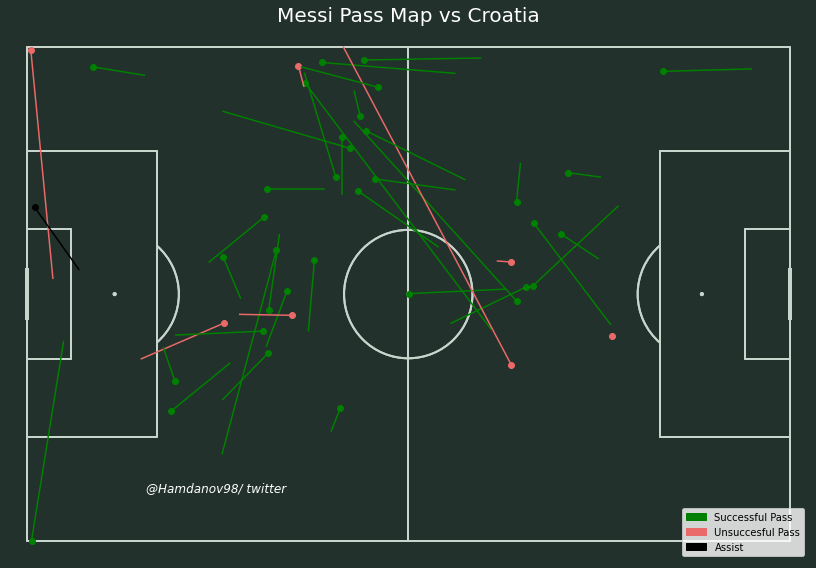

In [20]:
# Setup the pitch
pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13,8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
i=0
for i in range(len(messipasses)):
    if(messipasses.iloc[i].isAssist==True):
        plt.plot((messipasses.iloc[i]['x'],messipasses.iloc[i]['endX']),(messipasses.iloc[i]['y'],messipasses.iloc[i]['endY']),color='black')
        plt.scatter(messipasses.iloc[i]['x'],messipasses.iloc[i]['y'],color='black')
    else:
        if(messipasses.iloc[i].outcomeType=='Successful'):
            plt.plot((messipasses.iloc[i]['x'],messipasses.iloc[i]['endX']),(messipasses.iloc[i]['y'],messipasses.iloc[i]['endY']),color='green')
            plt.scatter(messipasses.iloc[i]['x'],messipasses.iloc[i]['y'],color='green')
        else:
            plt.plot((messipasses.iloc[i]['x'],messipasses.iloc[i]['endX']),(messipasses.iloc[i]['y'],messipasses.iloc[i]['endY']),color='#ea6969')
            plt.scatter(messipasses.iloc[i]['x'],messipasses.iloc[i]['y'],color='#ea6969')
   
   
green_patch=mpatches.Patch(color='green',label='Successful Pass')
red_patch = mpatches.Patch(color='#ea6969', label='Unsuccesful Pass')
black_patch = mpatches.Patch(color='black', label='Assist')
ax.legend(handles=[green_patch,red_patch,black_patch])   
plt.title('Messi Pass Map vs Croatia',color='white',size=20)



fig.text(.22,.14,f'@Hamdanov98/ twitter',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color=text_color)


plt.savefig('pics/MessiPassCroatia.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')